In [66]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from matplotlib import pyplot as plt
import wordcloud
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

import random

import spacy
# from spacy.lemmatizer import Lemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Legend: Patti Smith

In [2]:
URL = "https://www.lyrics.com/artist/Patti-Smith/126485"

In [3]:
response = requests.get(url=URL)

In [4]:
patti_html = response.text

In [5]:
filename = "patti_html.txt"

In [6]:
with open(file=filename, mode="w", encoding='utf8') as file:
    file.write(patti_html)

In [7]:
with open(file=filename, mode="r", encoding='utf8') as file:
    read_patti_html =file.read()

In [8]:
parsed_content = BeautifulSoup(markup=read_patti_html, features='html.parser')

In [9]:
all_songs_patti= parsed_content.find_all(name='td', attrs={'class':'tal qx'})

In [10]:
titles= []
for idx,line in enumerate(all_songs_patti):
    title = line.find(name='a').get_text()
    description = line.a['href']
    print(title, description)
    titles.append(title)

Wing /lyric/36259591/Patti+Smith/Wing
Wing /lyric/36001862/Patti+Smith/Wing
Because the Night /lyric/35303059/Patti+Smith/Because+the+Night
Because the Night /lyric/34547443/Patti+Smith/Because+the+Night
Because the Night /lyric/34546827/Patti+Smith/Because+the+Night
Because the Night /lyric/34240581/Patti+Smith/Because+the+Night
Because the Night /lyric/34582168/Patti+Smith/Because+the+Night
Because the Night /lyric/34020885/Patti+Smith/Because+the+Night
Because the Night /lyric/33974447/Patti+Smith/Because+the+Night
Gloria /lyric/33363030/Patti+Smith/Gloria
Blue /lyric/32907864/Patti+Smith/Blue
Because the Night /lyric/32856588/Patti+Smith/Because+the+Night
Wing /lyric/32997423/Patti+Smith/Wing
People Have the Power /lyric/32997422/Patti+Smith/People+Have+the+Power
Dancing Barefoot /lyric/32997421/Patti+Smith/Dancing+Barefoot
Summer Cannibals /lyric/32997420/Patti+Smith/Summer+Cannibals
When Doves Cry /lyric/32997430/Patti+Smith/When+Doves+Cry
Wild Leaves /lyric/32997429/Patti+Smith/

In [11]:
descriptions= []
for idx,line in enumerate(all_songs_patti):
    description = line.find(name='a').get_text()
    description = line.a['href']
    descriptions.append(description)

In [12]:
titles_descriptions = pd.DataFrame({'song':titles, 'lyric':descriptions})

In [13]:
titles_descriptions['website']= 'https://www.lyrics.com'

In [14]:
titles_descriptions['link']= titles_descriptions['website'] + titles_descriptions['lyric']

In [15]:
for i in titles_descriptions.link[0:61]:
    print (i)

https://www.lyrics.com/lyric/36259591/Patti+Smith/Wing
https://www.lyrics.com/lyric/36001862/Patti+Smith/Wing
https://www.lyrics.com/lyric/35303059/Patti+Smith/Because+the+Night
https://www.lyrics.com/lyric/34547443/Patti+Smith/Because+the+Night
https://www.lyrics.com/lyric/34546827/Patti+Smith/Because+the+Night
https://www.lyrics.com/lyric/34240581/Patti+Smith/Because+the+Night
https://www.lyrics.com/lyric/34582168/Patti+Smith/Because+the+Night
https://www.lyrics.com/lyric/34020885/Patti+Smith/Because+the+Night
https://www.lyrics.com/lyric/33974447/Patti+Smith/Because+the+Night
https://www.lyrics.com/lyric/33363030/Patti+Smith/Gloria
https://www.lyrics.com/lyric/32907864/Patti+Smith/Blue
https://www.lyrics.com/lyric/32856588/Patti+Smith/Because+the+Night
https://www.lyrics.com/lyric/32997423/Patti+Smith/Wing
https://www.lyrics.com/lyric/32997422/Patti+Smith/People+Have+the+Power
https://www.lyrics.com/lyric/32997421/Patti+Smith/Dancing+Barefoot
https://www.lyrics.com/lyric/32997420/Pa

In [16]:
file_names = []
start = len(titles_descriptions.link) - 22
for idx, dow in enumerate(titles_descriptions.link[-22:]):
    index = start + idx
    link = dow
    response_link= requests.get(link).text
    soup= BeautifulSoup(markup=response_link, features= "html.parser")
    lyrics = soup.find(name='pre').get_text()
    file= f"{index}_{titles[index].replace(' ', '_')}.txt"
    with open(file, mode="w") as file_out:
        file_out.write(lyrics)
    file_names.append(file)
    time.sleep(3)

print(file_names)

['598_As_the_Night_Goes_By.txt', '599_People_Have_the_Power.txt', '600_Beneath_the_Southern_Cross.txt', '601_Distant_Fingers.txt', "602_Ain't_It_Strange.txt", '603_Smells_Like_Teen_Spirit.txt', '604_Lo_and_Beholden.txt', "605_Ain't_It_Strange.txt", '606_Spell.txt', '607_Distant_Fingers.txt', '608_Peaceable_Kingdom.txt', '609_Gandhi.txt', "610_Ain't_It_Strange.txt", '611_Poppies.txt', '612_Everybody_Hurts.txt', '613_Oh_Yoko!.txt', '614_The_Wicked_Messenger.txt', '615_Our_world.txt', '616_Free_Money.txt', "617_Rock'N'Roll_Nigger.txt", '618_Amigo_Bronco.txt', '619_Memorial_Tribute.txt']


### Modern Star: Billie Eilish

In [17]:
URL = "https://www.lyrics.com/artist/Billie-Eilish/3177510"

In [18]:
response_2 = requests.get(url=URL)

In [19]:
Billie_html = response_2.text

In [20]:
filename_2 = "Billie_html.txt"

In [21]:
with open(file=filename_2, mode="w", encoding='utf8') as file:
    file.write(Billie_html)

In [22]:
with open(file=filename_2, mode="r", encoding='utf8') as file:
    read_Billie_html =file.read()

In [23]:
parsed_content_2 = BeautifulSoup(markup=read_Billie_html, features='html.parser')

In [24]:
all_songs_Billie= parsed_content_2.find_all(name='td', attrs={'class':'tal qx'})

In [25]:
titles_2= []
for idx,line in enumerate(all_songs_Billie):
    title_2 = line.find(name='a').get_text()
    description_2 = line.a['href']
    print(title_2, description_2)
    titles_2.append(title_2)

Bad Guy /lyric/36373475/Billie+Eilish/Bad+Guy
Bad Guy /lyric/36406691/Billie+Eilish/Bad+Guy
bury a friend /lyric/36101112/Billie+Eilish/bury+a+friend
Bury a Friend /lyric/35990255/Billie+Eilish/Bury+a+Friend
When I Was Older /lyric/36259589/Billie+Eilish/When+I+Was+Older
when the party's over /lyric/36185123/Billie+Eilish/when+the+party%27s+over
When the Party's Over /lyric/36185608/Billie+Eilish/When+the+Party%27s+Over
Bad Guy /lyric/36380389/Billie+Eilish/Bad+Guy
When I Was Older /lyric/35900269/Billie+Eilish/When+I+Was+Older
!!!!!!! /lyric/36088506/Billie+Eilish/%21%21%21%21%21%21%21
Bad Guy /lyric/36088505/Billie+Eilish/Bad+Guy
Xanny /lyric/36088503/Billie+Eilish/Xanny
You Should See Me in a Crown /lyric/36088502/Billie+Eilish/You+Should+See+Me+in+a+Crown
All the Good Girls Go to Hell /lyric/36088501/Billie+Eilish/All+the+Good+Girls+Go+to+Hell
Wish You Were Gay /lyric/36088500/Billie+Eilish/Wish+You+Were+Gay
When the Party's Over /lyric/36088504/Billie+Eilish/When+the+Party%27s+Ove

In [26]:
descriptions_2= []
for idx,line in enumerate(all_songs_Billie):
    description_2 = line.find(name='a').get_text()
    description_2 = line.a['href']
    descriptions_2.append(description_2)

In [27]:
titles_2_descriptions_2 = pd.DataFrame({'song':titles_2, 'lyric':descriptions_2})

In [28]:
titles_2_descriptions_2['website']= 'https://www.lyrics.com'

In [29]:
titles_2_descriptions_2['link']= titles_2_descriptions_2['website'] + titles_2_descriptions_2['lyric']

In [30]:
for i in titles_2_descriptions_2.link[:]:
    print (i)

https://www.lyrics.com/lyric/36373475/Billie+Eilish/Bad+Guy
https://www.lyrics.com/lyric/36406691/Billie+Eilish/Bad+Guy
https://www.lyrics.com/lyric/36101112/Billie+Eilish/bury+a+friend
https://www.lyrics.com/lyric/35990255/Billie+Eilish/Bury+a+Friend
https://www.lyrics.com/lyric/36259589/Billie+Eilish/When+I+Was+Older
https://www.lyrics.com/lyric/36185123/Billie+Eilish/when+the+party%27s+over
https://www.lyrics.com/lyric/36185608/Billie+Eilish/When+the+Party%27s+Over
https://www.lyrics.com/lyric/36380389/Billie+Eilish/Bad+Guy
https://www.lyrics.com/lyric/35900269/Billie+Eilish/When+I+Was+Older
https://www.lyrics.com/lyric/36088506/Billie+Eilish/%21%21%21%21%21%21%21
https://www.lyrics.com/lyric/36088505/Billie+Eilish/Bad+Guy
https://www.lyrics.com/lyric/36088503/Billie+Eilish/Xanny
https://www.lyrics.com/lyric/36088502/Billie+Eilish/You+Should+See+Me+in+a+Crown
https://www.lyrics.com/lyric/36088501/Billie+Eilish/All+the+Good+Girls+Go+to+Hell
https://www.lyrics.com/lyric/36088500/Billi

In [31]:
file_names_2 = []
start = len(titles_2_descriptions_2.link) - 22
for idx, dow in enumerate(titles_2_descriptions_2.link[-22:]):
    index = start + idx
    link = dow
    response_link= requests.get(link).text
    soup= BeautifulSoup(markup=response_link, features= "html.parser")
    lyrics = soup.find(name='pre').get_text()
    file= f"{index}_{titles[index].replace(' ', '_')}.txt"
    with open(file, mode="w") as file_out:
        file_out.write(lyrics)
    file_names_2.append(file)
    time.sleep(3)

print(file_names_2)

['152_Whirl_Away.txt', '153_1959.txt', '154_Spell.txt', "155_Don't_Say_Nothing.txt", '156_Dead_City.txt', '157_Blue_Poles.txt', '158_Death_Singing.txt', '159_Memento_Mori.txt', '160_Last_Call.txt', '161_One_Voice.txt', '162_Lo_and_Beholden.txt', '163_Boy_Cried_Wolf.txt', '164_Persuasion.txt', '165_Gone_Pie.txt', '166_China_Bird.txt', '167_Glitter_in_Their_Eyes.txt', '168_Strange_Messengers.txt', '169_Grateful.txt', '170_Upright_Come.txt', '171_New_Party.txt', "172_Libbie's_Song.txt", '173_Gung_Ho.txt']


### Bag of Words: Corpus creation

In [32]:
corpus_patti = []
for file in file_names:
    with open(file, 'r') as f:
        corpus_patti.append(f.read().replace("\n", " "))

print(corpus_patti)

["Darlin' come under cover  Another night to discover  Let's slip where senses gather  Let's drift between the sea and sky  As the night goes by   Sands shift  Orchids so strange  In the moonlight  Brushing our faces  Places where love blooms  And dies  While the night goes by  Oh, and the spirits call  Sun upon your shadows fall  Tracing every breath we draw   Come into my dreams  Come into my dreams  Darlin' let's go where the night goes  Let's drift where senses gather  Let's make this night last forever  Into my dreams  Into my dreams   Darlin' let's go  Where the night goes  Time slips  Oh darlin' how it flies  When the night goes by   All through the night  Sirens call  Come to me  I'll come to you  As the night softly  goes by bye   Midnight  Moon on our shoulder  Daybreak  Another one older  Darlin' heavenly blue  Glories fade into view   Let's go  Under the stars  That are beating  Under the moonlight  Stars shoot  Dusk just a whisper  Make this night  Last forever  Oh how I w

In [33]:
len(corpus_patti)

22

In [34]:
corpus_Billie = []
for file in file_names_2:
    with open(file, 'r') as f:
        corpus_Billie.append(f.read().replace("\n", " "))

print(corpus_Billie)

["What is it about them? I must be missing something They just keep doin' nothing Too intoxicated to be scared Better off without them They're nothing but unstable Bring ashtrays to the table And that's about the only thing they share  I'm in their secondhand smoke Still just drinking canned Coke I don't need a Xanny to feel better On designated drives home Only one who's not stoned Don't give me a Xanny, now or ever  (Can you check your Uber rating? Oh my God)  Wakin' up at sundown They're late to every party Nobody's ever sorry Too inebriated now to dance Morning as they comedown (comedown) Their pretty heads are hurting (hurting) They're awfully bad at learning (learning) Make the same mistakes, blame circumstance  I'm in their secondhand smoke Still just drinking canned Coke I don't need a Xanny to feel better On designated drives home Only one who's not stoned Don't give me a Xanny, now or ever  Please don't try to kiss me on the sidewalk On your cigarette break I can't afford to 

In [35]:
len(corpus_Billie)

22

### BOW Wordcloud from Legend Patti Smith

In [36]:
corpus_patti_str = ' '.join(corpus_patti)
print(corpus_patti_str)

Darlin' come under cover  Another night to discover  Let's slip where senses gather  Let's drift between the sea and sky  As the night goes by   Sands shift  Orchids so strange  In the moonlight  Brushing our faces  Places where love blooms  And dies  While the night goes by  Oh, and the spirits call  Sun upon your shadows fall  Tracing every breath we draw   Come into my dreams  Come into my dreams  Darlin' let's go where the night goes  Let's drift where senses gather  Let's make this night last forever  Into my dreams  Into my dreams   Darlin' let's go  Where the night goes  Time slips  Oh darlin' how it flies  When the night goes by   All through the night  Sirens call  Come to me  I'll come to you  As the night softly  goes by bye   Midnight  Moon on our shoulder  Daybreak  Another one older  Darlin' heavenly blue  Glories fade into view   Let's go  Under the stars  That are beating  Under the moonlight  Stars shoot  Dusk just a whisper  Make this night  Last forever  Oh how I won

In [37]:
filename_corpus_patti_str = "corpus_patti_str.txt"
with open(file=filename_corpus_patti_str, mode="w", encoding='utf8') as file:
    file.write(corpus_patti_str)

In [38]:
# open the file and read it into a variable
corpus_patti_str_novel = open('corpus_patti_str.txt', 'r').read()

In [41]:
stopwords = set(STOPWORDS)

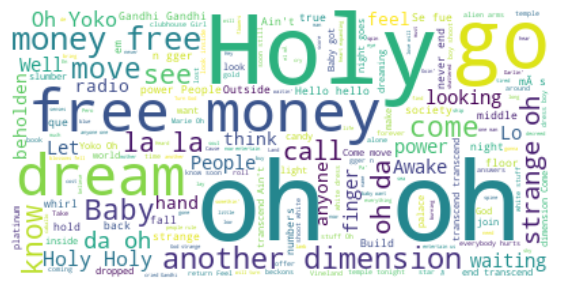

In [42]:
stopwords.add("said") #add the words said tostopwords

# instantiate a word cloud object
corpus_patti_str_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

#re-generate the word cloud
corpus_patti_str_wc.generate(corpus_patti_str_novel)

#display the cloud 
fig = plt.figure()
fig.set_figwidth(7) #set width
fig.set_figheight(12) #set height

plt.imshow(corpus_patti_str_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### BOW Wordcloud from Modern Star Billie Eilish

In [43]:
corpus_Billie_str = ' '.join(corpus_Billie)
print(corpus_Billie_str)

What is it about them? I must be missing something They just keep doin' nothing Too intoxicated to be scared Better off without them They're nothing but unstable Bring ashtrays to the table And that's about the only thing they share  I'm in their secondhand smoke Still just drinking canned Coke I don't need a Xanny to feel better On designated drives home Only one who's not stoned Don't give me a Xanny, now or ever  (Can you check your Uber rating? Oh my God)  Wakin' up at sundown They're late to every party Nobody's ever sorry Too inebriated now to dance Morning as they comedown (comedown) Their pretty heads are hurting (hurting) They're awfully bad at learning (learning) Make the same mistakes, blame circumstance  I'm in their secondhand smoke Still just drinking canned Coke I don't need a Xanny to feel better On designated drives home Only one who's not stoned Don't give me a Xanny, now or ever  Please don't try to kiss me on the sidewalk On your cigarette break I can't afford to lo

In [44]:
filename_corpus_Billie_str = "corpus_Billie_str.txt"
with open(file=filename_corpus_Billie_str, mode="w", encoding='utf8') as file:
    file.write(corpus_Billie_str)

In [45]:
# open the file and read it into a variable alice_novel
corpus_Billie_str_novel = open('corpus_Billie_str.txt', 'r').read()

In [46]:
stopwords = set(STOPWORDS)

In [48]:
alice_mask = np.array(Image.open('alice_mask.png'))

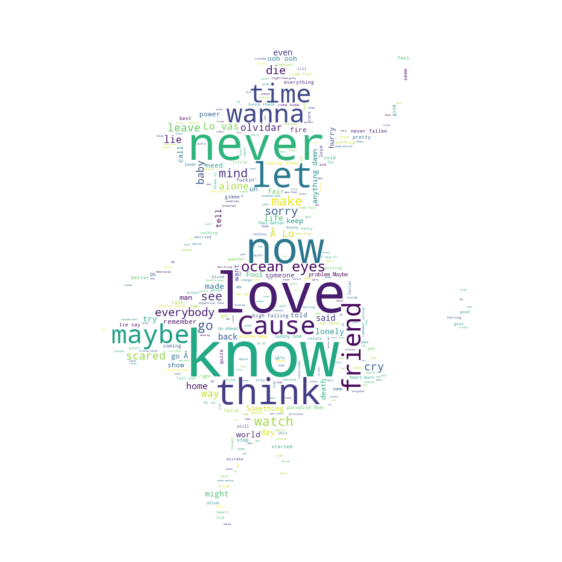

In [49]:
# instantiate a word cloud object 
corpus_Billie_str_wc = WordCloud(background_color='white', max_words=2000,
                      mask=alice_mask, stopwords=stopwords
                      )
#generate the word cloud 
corpus_Billie_str_wc.generate(corpus_Billie_str_novel)

#display th word cloud 
fig = plt.figure()
fig.set_figwidth(7) # set width
fig.set_figheight(12) # set height

plt.imshow(corpus_Billie_str_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### BOW Wordcloud for my Masterthesis

In [70]:
# open the file and read it into a variable
Masterthesis = open('Masterthesis_Text.txt', 'r').read().replace("\n", " ").replace("\t", " ")

In [71]:
Masterthesis

'Analyse des Zusammenhangs der Vergütung von Manager*innen und Firmenperformance    Empirische Fallstudie am Beispiel von Vorstandsvorsitzenden der DAX-Unternehmen in den Jahren 2010 bis 2019    Masterthesis  zur Erlangung des Grades Master of Arts (M.A.) des Fachbereichs Wirtschaftswissenschaften (Fakultät 1) der Hochschule Bremen  vorgelegt von Helge zu Jeddeloh (Matrikel-Nr. 409340) fu¨r den Studiengang Business Management M.A.  Erstprüfer: Herr Prof. Dr. Armin Varmaz Zweitprüferin: Frau Katharina Riebe Hochschule Bremen, School of International Business (SIB)  22.12.2020       Vorwort  Die Durchführung und Realisierbarkeit der Untersuchung beruht im Wesentlichen auf Kenntnissen, die ich während meines Studiums in den Modulen "Wissenschaftliche Forschungsmethoden" (1. Semester) sowie "Corporate Finance" (3. Semester) erworben habe. Darüber hinaus konnte ich durch ein freiwilliges Wahlmodul "Matlab fu¨r Sozial- und Wirtschaftswissenschaftler" (3. Semester) sowie durch Tätigkeiten als

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
germany_mask = np.array(Image.open('germany-flag-xl.png'))

In [74]:
wnl = WordNetLemmatizer()

In [75]:
def lemmatize_text(Masterthesis):
    words = nltk.word_tokenize(Masterthesis)
    
    words = [word for word in words if word.lower() not in stopwords]
    lemmas = [wnl.lemmatize(word) for word in words]
    return " ".join(lemmas)

text = Masterthesis
lemmatized_text = lemmatize_text(Masterthesis)
print("Lemmatized text:", lemmatized_text)


TypeError: argument of type 'LazyCorpusLoader' is not iterable

In [67]:
Masterthesis_wc_ger_lem = WordCloud(
    background_color='white',
    mode= 'RGBA',
    max_words=500,
    stopwords=stopwords,
    width=3000,
    height=2000,
    mask=germany_mask)

In [68]:
lemmatized_text

"Analyse de Zusammenhangs der Vergütung von Manager * innen und Firmenperformance Empirische Fallstudie Beispiel von Vorstandsvorsitzenden der DAX-Unternehmen den Jahren 2010 bi 2019 Masterthesis zur Erlangung de Grades Master Arts ( M.A . ) de Fachbereichs Wirtschaftswissenschaften ( Fakultät 1 ) der Hochschule Bremen vorgelegt von Helge zu Jeddeloh ( Matrikel-Nr . 409340 ) fu¨r den Studiengang Business Management M.A . Erstprüfer : Herr Prof. Dr. Armin Varmaz Zweitprüferin : Frau Katharina Riebe Hochschule Bremen , School International Business ( SIB ) 22.12.2020 Vorwort Die Durchführung und Realisierbarkeit der Untersuchung beruht im Wesentlichen auf Kenntnissen , die ich während meines Studiums den Modulen `` Wissenschaftliche Forschungsmethoden '' ( 1 . Semester ) sowie `` Corporate Finance '' ( 3 . Semester ) erworben habe . Darüber hinaus konnte ich durch ein freiwilliges Wahlmodul `` Matlab fu¨r Sozial- und Wirtschaftswissenschaftler '' ( 3 . Semester ) sowie durch Tätigkeiten 

In [69]:
Masterthesis_wc_ger_lem.generate(lemmatized_text)

TypeError: 'LazyCorpusLoader' object is not iterable

In [ ]:
# image_colors = ImageColorGenerator(germany_mask)
# plt.figure(figsize=[15,20])
# plt.imshow(Masterthesis_wc_ger_lem.recolor(color_func=image_colors), interpolation = "bilinear")
# plt.axis('off')
# plt.show()'

In [ ]:
# Masterthesis_wc_ger_lem = WordCloud(
#     background_color='white',
#     mode= 'RGBA',
#     max_words=500,
#     stopwords=stopwords,
#     width=3000,
#     height=2000,
#     mask=germany_mask)

In [ ]:
# Masterthesis_wc.generate(Masterthesis)

In [ ]:
# Masterthesis_wc_ger.generate(Masterthesis)

In [ ]:
# Masterthesis_wc.generate(Masterthesis)

In [ ]:
# Masterthesis_wc_ger.generate(Masterthesis)

In [65]:
# !pip install nltk

In [ ]:
# Masterthesis = open('Masterthesis_Text.txt')

In [ ]:
# nlp = spacy.load('Masterthesis_Text.txt')

In [ ]:
# 'mails=['Hallo. Ich spielte am frühen Morgen und ging dann zu einem Freund. Auf Wiedersehen', 'Guten Tag Ich mochte Bälle und will etwas kaufen. Tschüss']

# mails_lemma = []

# for mail in mails:
#      doc = nlp(mail)
#      result = ' '.join([x.lemma_ for x in doc]) 
#      mails_lemma.append(result)'

In [ ]:
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')

In [ ]:
# nltk.download('omw-1.4')

In [64]:
stopwords = stopwords.words('german')

AttributeError: 'set' object has no attribute 'words'

In [62]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
# import spacy
# nlp = spacy.load('de_core_news_md')

# mails=['Hallo. Ich spielte am frühen Morgen und ging dann zu einem Freund. Auf Wiedersehen', 'Guten Tag Ich mochte Bälle und will etwas kaufen. Tschüss']

# mails_lemma = []

# for mail in mails:
#      doc = nlp(mail)
#      result = ' '.join([x.lemma_ for x in doc]) 
#      mails_lemma.append(result)

In [ ]:
# def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
#     h = 120  # Set the hue to 120 for green
#     s = int(100.0 * 255.0 / 255.0)
#     l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

#     return "hsl({}, {}%, {}%)".format(h, s, l)

# Masterthesis_wc = wordcloud.WordCloud(
#     background_color='white',
#     max_words=100,
#     contour_color='steelblue',
#     stopwords=stopwords,
#     color_func=random_color_func,
#     random_state=random.Random(42))

# # generate the word cloud
# Masterthesis_wc.generate(Masterthesis)

# #display the cloud
# fig = plt.figure()
# fig.set_figwidth(7) #set width
# fig.set_figheight(12) #set height

# plt.imshow(Masterthesis_wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()

# # plt.figure(figsize = (40,____))
# # plt.imshow(cloud, interpolation='bilinear')
# # ____.savefig('cloud.png')

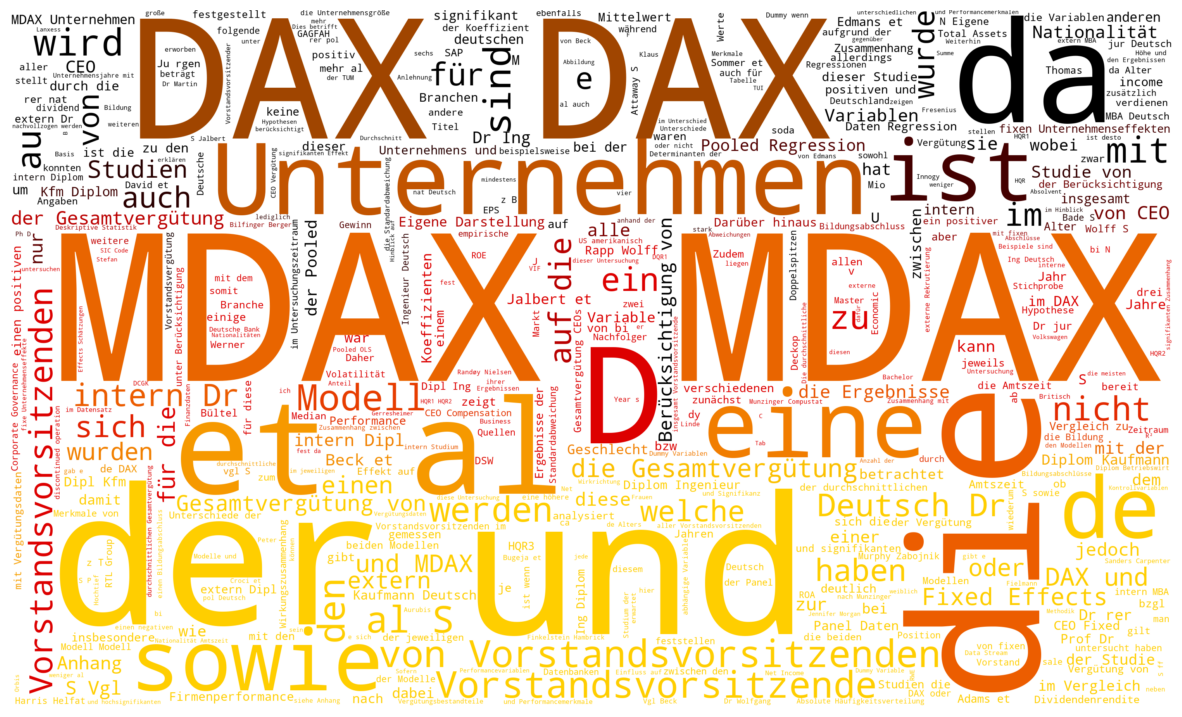

In [59]:
image_colors = ImageColorGenerator(germany_mask)
plt.figure(figsize=[15,20])
plt.imshow(Masterthesis_wc_ger_lem.recolor(color_func=image_colors), interpolation = "bilinear")
plt.axis('off')
plt.show()